# Goodreads 2020-2025 Data

## import necessary modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette(["#A4D6ED"])

In [3]:
# Load the data
df = pd.read_csv('top_books_decade2020.csv', index_col=[0])

# Cleaning Data

In [4]:
df.dtypes

Title                 object
Author                object
Stars                float64
Number of Reviews     object
Genres                object
dtype: object

In [5]:
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"Missing values:\n{df.isnull().sum()}")

Dataset shape: (2221, 5)
Columns: ['Title', 'Author', 'Stars', 'Number of Reviews', 'Genres']
Missing values:
Title                 0
Author                0
Stars                 6
Number of Reviews     6
Genres               20
dtype: int64


In [6]:
df.head()

,Title,Author,Stars,Number of Reviews,Genres
0,The Invisible Life of Addie LaRue,V.E. Schwab,4.17,"1,370,900","Fantasy, Fiction, Romance, Historical Fiction,..."
1,Project Hail Mary,Andy Weir,4.50,"829,014","Science Fiction, Fiction, Audiobook, Book Club..."
2,The House in the Cerulean Sea (Cerulean Chroni...,T.J. Klune,4.38,"852,465","Fantasy, Fiction, LGBT, Romance, Audiobook, Bo..."
3,The Midnight Library,Matt Haig,3.98,"2,246,187","Fiction, Fantasy, Book Club, Audiobook, Contem..."
4,I'm Glad My Mom Died,Jennette McCurdy,4.44,"1,331,321","Nonfiction, Memoir, Audiobook, Biography, Auto..."


In [7]:
# Data preprocessing
def clean_review_count(review_str):
    """Convert review count strings to numeric values"""
    if pd.isna(review_str):
        return 0
    
    review_str = str(review_str).lower().replace(',', '')
    
    if 'k' in review_str:
        return float(review_str.replace('k', '')) * 1000
    elif 'm' in review_str:
        return float(review_str.replace('m', '')) * 1000000
    else:
        try:
            return float(review_str)
        except:
            return 0

# Clean the data
df['Numeric_Reviews'] = df['Number of Reviews'].apply(clean_review_count)
df = df.dropna(subset=['Stars'])  # Remove rows with missing ratings

## Data Visualisation

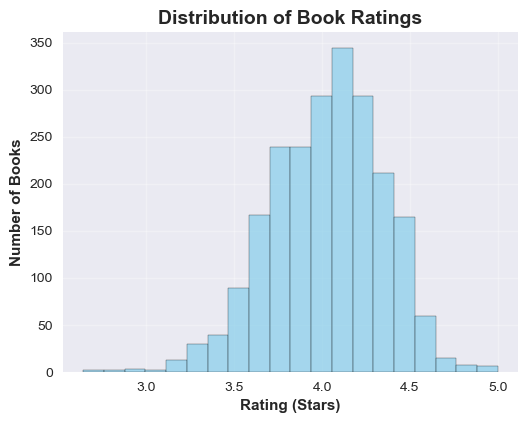

In [8]:
# Create figure with subplots
fig = plt.figure(figsize=(20, 15))

# 1. Rating Distribution
plt.subplot(3, 3, 1)
plt.hist(df['Stars'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Book Ratings', fontsize=14, fontweight='bold')
plt.xlabel('Rating (Stars)', fontweight='bold')
plt.ylabel('Number of Books',fontweight='bold')
plt.grid(True, alpha=0.3)
plt.savefig('dist_ratings.png', bbox_inches='tight')


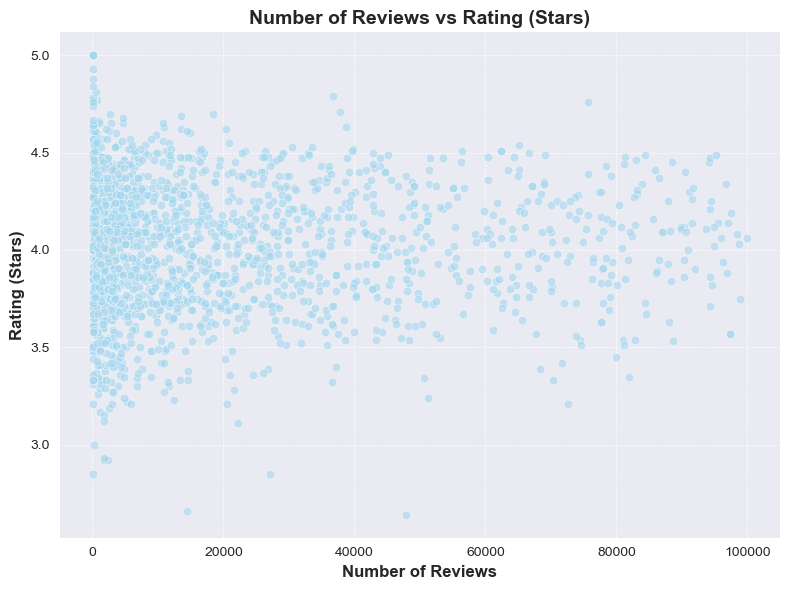

In [9]:
# Filter the dataset
df_filtered = df[(df['Numeric_Reviews'] > 0) & (df['Numeric_Reviews'] < 100000)]



plt.figure(figsize=(8, 6))

# Scatter plot with log-scaled x-axis
sns.scatterplot(
    data=df_filtered,
    x='Numeric_Reviews',
    y='Stars',
    alpha=0.6,
    s=40
)

plt.title('Number of Reviews vs Rating (Stars)', fontsize=14, fontweight='bold')
plt.xlabel('Number of Reviews', fontsize=12, fontweight='bold')
plt.ylabel('Rating (Stars)', fontsize=12, fontweight='bold')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('reveiewsvsratings.png',bbox_inches='tight')
plt.show()


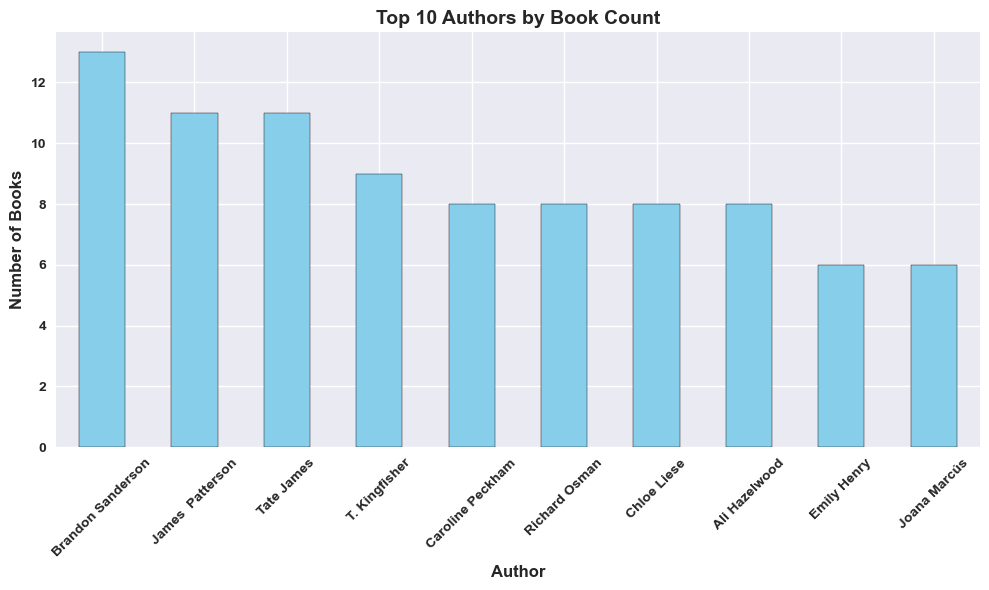

In [10]:
top_authors = df['Author'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(10, 6))
top_authors.plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')

ax.set_ylabel('Number of Books', fontsize=12, fontweight='bold')
ax.set_xlabel('Author', fontsize=12, fontweight='bold')
ax.set_title('Top 10 Authors by Book Count', fontsize=14, fontweight='bold')

ax.tick_params(axis='x', labelrotation=45, labelsize=10, width=1)
ax.tick_params(axis='y', labelsize=10, width=1)

# To make tick labels themselves bold:
ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold')

plt.tight_layout()
plt.savefig('books_count.png', bbox_inches='tight')
plt.show()

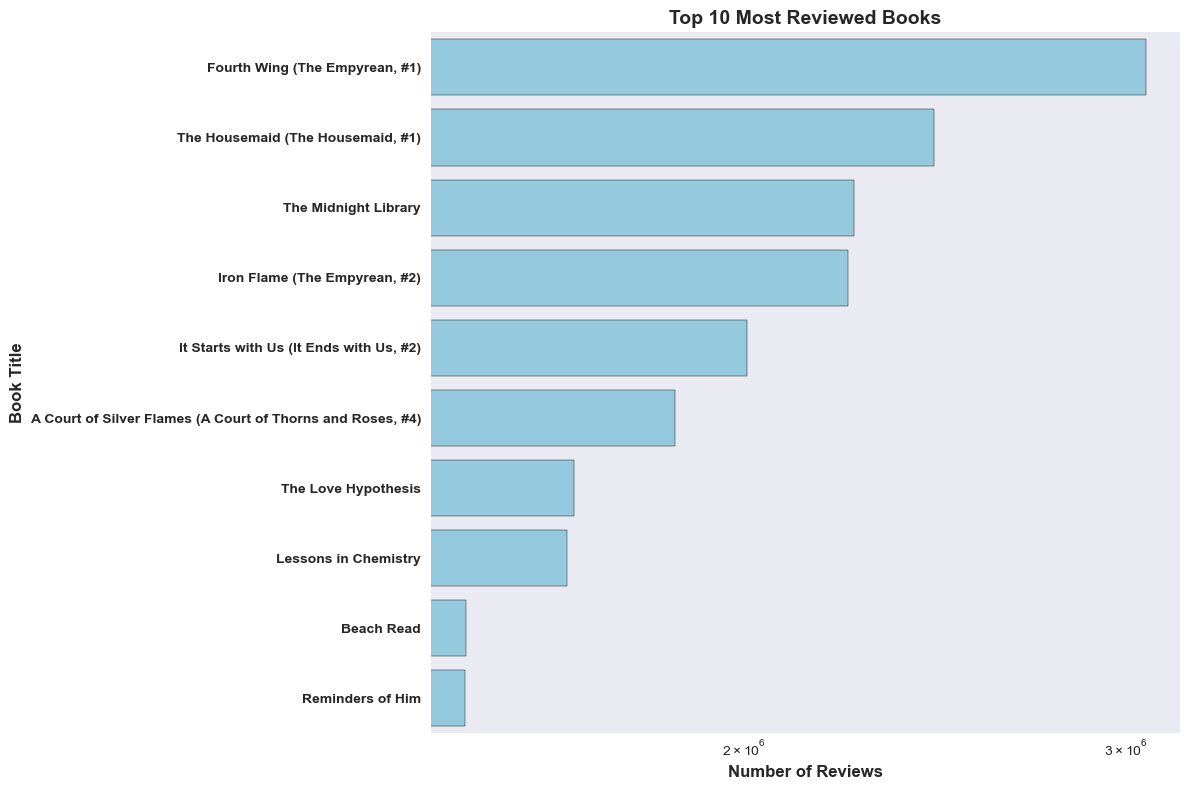

In [11]:
top_books = df.sort_values('Numeric_Reviews', ascending=False).head(10)

plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=top_books,
    x='Numeric_Reviews',
    y='Title',
    orient='h',
    color='skyblue',
    edgecolor='black'
)

ax.set_xlabel('Number of Reviews', fontsize=12, fontweight='bold')
ax.set_ylabel('Book Title', fontsize=12, fontweight='bold')
ax.set_title('Top 10 Most Reviewed Books', fontsize=14, fontweight='bold')
ax.set_xscale('log')

# Bold tick labels
ax.tick_params(axis='x', labelsize=10, width=1)
ax.tick_params(axis='y', labelsize=10, width=1)
ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold')

plt.tight_layout()
plt.savefig('most_reviewed.png', bbox_inches='tight')
plt.show()

In [12]:
# Summary Statistics
print("\n=== SUMMARY STATISTICS ===")
print(f"Total books analyzed: {len(df)}")
print(f"Average rating: {df['Stars'].mean():.2f}")
print(f"Median rating: {df['Stars'].median():.2f}")
print(f"Rating standard deviation: {df['Stars'].std():.2f}")
print(f"Books with 5 stars: {len(df[df['Stars'] == 5.0])}")
print(f"Books with 4+ stars: {len(df[df['Stars'] >= 4.0])}")
print(f"Most common rating: {df['Stars'].mode()[0]}")


=== SUMMARY STATISTICS ===
Total books analyzed: 2215
Average rating: 4.03
Median rating: 4.05
Rating standard deviation: 0.32
Books with 5 stars: 5
Books with 4+ stars: 1248
Most common rating: 4.09
